In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#N_T = np.load('N_T.npy')
N_T2 = np.load('N_T_rho_0_0001.npy')

Text(0, 0.5, 'N Loops')

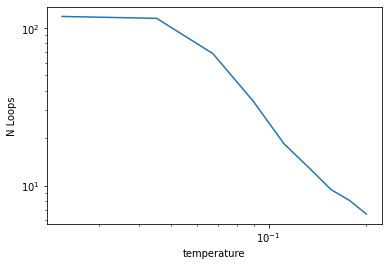

In [12]:
#plt.plot(N_T[1:,0],N_T[1:,1])
plt.plot(N_T2[1:,0],N_T2[1:,1])
#plt.ylim(0,50)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('temperature')
plt.ylabel('N Loops')